# Student Performance Indicator

**1) Problem statement**
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


**2) Data Collection**
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

## Importing the libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset

In [60]:
df = pd.read_csv('./data/student.csv')

In [61]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [62]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [63]:
# df['average_score'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3
# df.head()

In [64]:
print("Categories in 'gender' variable: ", end="")
print(df['gender'].unique(), end="\n\n")

print("Categories in 'race/ethnicity' variable: ", end="")
print(df['race_ethnicity'].unique(), end="\n\n")

print("Categories in 'parental level of education' variable: ", end="")
print(df['parental_level_of_education'].unique(), end="\n\n")

print("Categories in 'lunch' variable: ", end="")
print(df['lunch'].unique(), end="\n\n")

print("Categories in 'test preparation course' variable: ", end="")
print(df['test_preparation_course'].unique(), end="\n\n")

Categories in 'gender' variable: ['female' 'male']

Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable: ['standard' 'free/reduced']

Categories in 'test preparation course' variable: ['none' 'completed']



## Selecting independent and dependent variables

In [65]:
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']

In [66]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [67]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

## Feature Transformation

In [68]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", categorical_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [69]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

## Train Test Split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

## Model Training and Selection

In [72]:
def evaluate_model(true, predicted):
    r2_square = r2_score(true, predicted)
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mse)
    return r2_square, mse, mae, rmse

In [73]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    # 'CatBoost Regressor': CatBoostRegressor(verbose=False),
    'AdaBoost Regressor': AdaBoostRegressor(),
}

In [74]:
model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train, mse_train, mae_train, rmse_train = evaluate_model(y_train, y_train_pred)
    r2_test, mse_test, mae_test, rmse_test = evaluate_model(y_test, y_test_pred)

    model_list.append(list(models.keys())[i])
    print(f"Performance metrics for {list(models.keys())[i]} are as follows ->\n")

    print("Model Performance on Training Data\n")
    print(" - R Squared Score -> {:.4f}".format(r2_train))
    print(" - Mean Squared Error -> {:.4f}".format(mse_train))
    print(" - Mean Absolute Error -> {:.4f}".format(mae_train))
    print(" - Root Mean Squared Error -> {:.4f}".format(rmse_train))

    print('-'*35)

    print("\nModel Performance on Testing Data\n")
    print(" - R Squared Score -> {:.4f}".format(r2_test))
    print(" - Mean Squared Error -> {:.4f}".format(mse_test))
    print(" - Mean Absolute Error -> {:.4f}".format(mae_test))
    print(" - Root Mean Squared Error -> {:.4f}".format(rmse_test))
    r2_list.append(r2_test)

    print('='*35)
    print('\n')

Performance metrics for Linear Regression are as follows ->

Model Performance on Training Data

 - R Squared Score -> 0.8743
 - Mean Squared Error -> 28.3349
 - Mean Absolute Error -> 4.2667
 - Root Mean Squared Error -> 5.3231
-----------------------------------

Model Performance on Testing Data

 - R Squared Score -> 0.8804
 - Mean Squared Error -> 29.0952
 - Mean Absolute Error -> 4.2148
 - Root Mean Squared Error -> 5.3940


Performance metrics for Lasso are as follows ->

Model Performance on Training Data

 - R Squared Score -> 0.8071
 - Mean Squared Error -> 43.4784
 - Mean Absolute Error -> 5.2063
 - Root Mean Squared Error -> 6.5938
-----------------------------------

Model Performance on Testing Data

 - R Squared Score -> 0.8253
 - Mean Squared Error -> 42.5064
 - Mean Absolute Error -> 5.1579
 - Root Mean Squared Error -> 6.5197


Performance metrics for Ridge are as follows ->

Model Performance on Training Data

 - R Squared Score -> 0.8743
 - Mean Squared Error -> 28.

### Results

In [75]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R Squared Score']).sort_values(by='R Squared Score', ascending=False)

,Model,R Squared Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.851162
7,AdaBoost Regressor,0.846127
6,XGBoost Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.718972


### Linear Regression

In [76]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f%%" % score)

Accuracy of the model is 88.04%


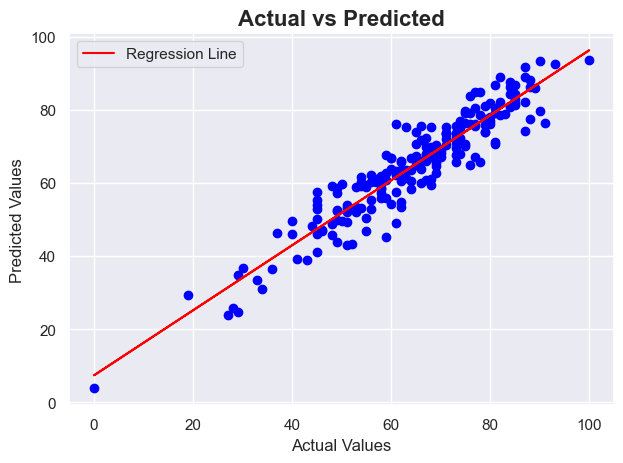

In [78]:
sns.set(style='darkgrid')
plt.scatter(y_test, y_pred, color='blue')
m, c = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + c, color='red', label='Regression Line')
plt.title('Actual vs Predicted', size=16, weight='bold')
plt.xlabel('Actual Values', size=12)
plt.ylabel('Predicted Values', size=12)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [79]:
pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


## Hyperparameter Tuning

In [85]:
params = {
    "Decision Tree": {
        "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
        "splitter": ["best", "random"],
        "max_features": ["sqrt", "log2"],
    },
    "Random Forest": {
        "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
        "max_features": ["sqrt", "log2", None],
        "n_estimators": [8, 16, 32, 64, 128, 256],
    },
    "Linear Regression": {
        "fit_intercept": [True, False],
        "copy_X": [True, False],
    },
    "XGBRegressor": {
        "learning_rate": [0.1, 0.01, 0.05, 0.001],
        "n_estimators": [8, 16, 32, 64, 128, 256],
    },
    "AdaBoost Regressor": {
        "learning_rate": [0.1, 0.01, 0.5, 0.001],
        "loss": ["linear", "square", "exponential"],
        "n_estimators": [8, 16, 32, 64, 128, 256],
    },
    "KNN": {
        "n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10],
        "weights": ["uniform", "distance"],
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
        "leaf_size": [10, 20, 30, 40, 50],
    }
}

In [86]:
randomcv_models = [
    ("Decision Tree", DecisionTreeRegressor(), params["Decision Tree"]),
    ("Random Forest", RandomForestRegressor(), params["Random Forest"]),
    ("Linear Regression", LinearRegression(), params["Linear Regression"]),
    ("XGBRegressor", XGBRegressor(), params["XGBRegressor"]),
    ("AdaBoost Regressor", AdaBoostRegressor(), params["AdaBoost Regressor"]),
    ("KNN", KNeighborsRegressor(), params["KNN"]),
]

In [87]:
model_param = {}

for name, model, param in randomcv_models:
    random = RandomizedSearchCV(estimator=model, param_distributions=param, cv=3, n_iter=10, verbose=2, n_jobs=-1, random_state=42)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for mode_name in model_param:
    print(f"------------------ Best Params for {mode_name} ------------------\n")
    print(model_param[mode_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
------------------ Best Params for Decision Tree ------------------

{'splitter': 'best', 'max_features': 'sqrt', 'criterion': 'absolute_error'}
------------------ Best Params for Random Forest ------------------

{'n_estimators': 128, 'max_features': None, 'criterion': 'friedman_mse'}
------------------ Best Params for Linear Regression ------------------

{'fit_intercept': True, 'copy_X': True}
------------------ Best Params for XGBRegressor ------------------

{'n_estimators': 128, 'learning_rate': 0.05}
------------------ Best Params for AdaBoost Regressor ------------------

{'n_estimators': 128, 'loss': 'square', 'learnin

In [88]:
models = {
    'Linear Regression': LinearRegression(fit_intercept=True, copy_X=True),
    'Decision Tree': DecisionTreeRegressor(splitter='best', max_features='log2', criterion='squared_error'),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=128, max_features=None, criterion='friedman_mse'),
    'XGBoost Regressor': XGBRegressor(n_estimators=128, learning_rate=0.05),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=128, loss='square', learning_rate=0.1),
    'K-Neighbors Regressor': KNeighborsRegressor(n_neighbors=10, weights='uniform', leaf_size=10, algorithm='ball_tree'),
}

model_list_tuned = []
r2_list_tuned = []

for i in range(len(models)):
    model = list(models.values())[i]
    
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train, mse_train, mae_train, rmse_train = evaluate_model(y_train, y_train_pred)
    r2_test, mse_test, mae_test, rmse_test = evaluate_model(y_test, y_test_pred)

    model_list_tuned.append(list(models.keys())[i])
    print(f"Performance metrics for {list(models.keys())[i]} are as follows ->\n")

    print("Model Performance on Training Data\n")
    print(" - R Squared Score -> {:.4f}".format(r2_train))
    print(" - Mean Squared Error -> {:.4f}".format(mse_train))
    print(" - Mean Absolute Error -> {:.4f}".format(mae_train))
    print(" - Root Mean Squared Error -> {:.4f}".format(rmse_train))

    print('-'*35)

    print("\nModel Performance on Testing Data\n")
    print(" - R Squared Score -> {:.4f}".format(r2_test))
    print(" - Mean Squared Error -> {:.4f}".format(mse_test))
    print(" - Mean Absolute Error -> {:.4f}".format(mae_test))
    print(" - Root Mean Squared Error -> {:.4f}".format(rmse_test))
    r2_list_tuned.append(r2_test)

    print('='*35)
    print('\n')

Performance metrics for Linear Regression are as follows ->

Model Performance on Training Data

 - R Squared Score -> 0.8743
 - Mean Squared Error -> 28.3349
 - Mean Absolute Error -> 4.2667
 - Root Mean Squared Error -> 5.3231
-----------------------------------

Model Performance on Testing Data

 - R Squared Score -> 0.8804
 - Mean Squared Error -> 29.0952
 - Mean Absolute Error -> 4.2148
 - Root Mean Squared Error -> 5.3940


Performance metrics for Decision Tree are as follows ->

Model Performance on Training Data

 - R Squared Score -> 0.9983
 - Mean Squared Error -> 0.3831
 - Mean Absolute Error -> 0.0813
 - Root Mean Squared Error -> 0.6190
-----------------------------------

Model Performance on Testing Data

 - R Squared Score -> 0.6834
 - Mean Squared Error -> 77.0350
 - Mean Absolute Error -> 6.8650
 - Root Mean Squared Error -> 8.7770


Performance metrics for Random Forest Regressor are as follows ->

Model Performance on Training Data

 - R Squared Score -> 0.9768
 - 

In [89]:
pd.DataFrame(list(zip(model_list_tuned, r2_list_tuned)), columns=['Model', 'R Squared Score']).sort_values(by='R Squared Score', ascending=False)

,Model,R Squared Score
0,Linear Regression,0.880433
3,XGBoost Regressor,0.861979
2,Random Forest Regressor,0.854471
4,AdaBoost Regressor,0.850405
5,K-Neighbors Regressor,0.793423
1,Decision Tree,0.683424
